In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,roc_curve,precision_recall_curve
from sklearn.model_selection import cross_val_score,train_test_split
import matplotlib.pyplot as plt
import pickle


In [13]:
# 读取数据
data = pd.read_csv(r'D:\ArcgisData\pred_organic_p_n\feature_table\feature_table_result\all_tl_result.csv')
print(len(data))
# 删除有缺失值的行
data.dropna(inplace=True)
len(data),data.columns


424


(424,
 Index(['Unnamed: 0', 'HZR', '坡位', '岩性', '地类名称', '亚类', '属', '土种', 'TWI5',
        'TPI201', 'TPI101', 'TPI11', 'TPI3', 'TMP', 'SOILQS', 'SLOP', 'PRE',
        'NIGTH', 'NDVI', 'DEM', 'CUR', 'ASP', 'PLCUR', 'POCUR', 'OSJL', 'LAT',
        'LON', 'DZ', 'DL', 'TRI'],
       dtype='object'))

In [14]:
data.drop(['Unnamed: 0','HZR','坡位','岩性','地类名称','TWI5','TPI101', 'TPI11', 'TPI3', 'SOILQS', 'NIGTH',  'CUR', 'ASP', 'PLCUR', 'POCUR', 'OSJL', 'TRI'], axis=1, inplace=True)
data.columns

Index(['亚类', '属', '土种', 'TPI201', 'TMP', 'SLOP', 'PRE', 'NDVI', 'DEM', 'LAT',
       'LON', 'DZ', 'DL'],
      dtype='object')

In [15]:
data['DL'] = data['DL'].astype(str)
data['DZ'] = data['DZ'].astype(str)
data.dtypes

亚类         object
属          object
土种         object
TPI201    float64
TMP       float64
SLOP      float64
PRE       float64
NDVI      float64
DEM       float64
LAT       float64
LON       float64
DZ         object
DL         object
dtype: object

In [16]:
# data['label'] = data.apply(lambda row: ''.join(row[['亚类', '属','土种']]), axis=1)
data.drop(columns=['亚类','属'], inplace=True)
data.columns

Index(['土种', 'TPI201', 'TMP', 'SLOP', 'PRE', 'NDVI', 'DEM', 'LAT', 'LON', 'DZ',
       'DL'],
      dtype='object')

In [17]:
data

,土种,TPI201,TMP,SLOP,PRE,NDVI,DEM,LAT,LON,DZ,DL
0,硅铁质中层黄壤,-9.662842,126.000000,13.553528,852.8333,228.0,1489.2,2917300.0,422950.0,6,25
1,硅铁质中层黄壤,48.692260,128.166670,10.494256,845.6667,219.0,1487.3,2918230.0,418540.0,6,25
2,硅铁质中层黄壤,-8.729492,124.166664,21.866072,902.8333,187.0,1465.2,3144910.0,477430.0,6,3
3,硅铁质中层黄壤,0.955444,128.166670,9.961898,845.6667,219.0,1454.8,2916130.0,418210.0,6,25
4,硅铁质中层黄壤,2.545776,126.000000,34.142120,852.8333,228.0,1504.9,2917390.0,423220.0,6,25
...,...,...,...,...,...,...,...,...,...,...,...
419,厚层泥质黄棕壤,19.782104,133.583330,10.614898,882.5000,184.0,1473.6,3120550.0,476350.0,6,6
420,厚层泥质黄棕壤,15.012817,132.083330,9.836691,884.0000,196.0,1462.2,3119170.0,467530.0,6,3
421,中层泥质黄棕壤,25.525757,122.500000,18.445740,905.6667,170.0,1552.5,3141160.0,464380.0,6,6
422,中层泥质黄棕壤,61.216064,119.583336,34.981655,917.5000,311.0,1674.4,3148030.0,464560.0,6,6


In [18]:
le =LabelEncoder()
data['土种'] = le.fit_transform(data['土种'])

In [20]:
# 划分数据

X = data.drop(columns='土种')

y = data['土种']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

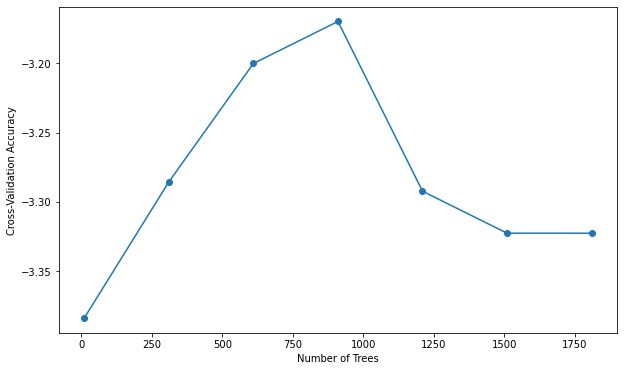

The optimal number of trees is 910


In [22]:
# 设置树的数目范围
n_estimators_range = range(10, 2000, 300)
cv_scores = []

# 使用交叉验证
for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    #scores = cross_val_score(rf, X, y, cv=5, scoring='r2')  # 5折交叉验证
    scores = cross_val_score(rf,X_train, y_train, cv=3, scoring='neg_mean_squared_error')  # 3折交叉验证
    cv_scores.append(scores.mean())

# 绘制交叉验证得分图
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation Accuracy')
# plt.savefig('target.png') # 保存图片
plt.show()

# 选择最优数量的树
optimal_n_estimators = n_estimators_range[cv_scores.index(max(cv_scores))]
print("The optimal number of trees is {}".format(optimal_n_estimators))

In [24]:
# 初始化和训练随机森林模型
rf = RandomForestClassifier(n_estimators=910, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=910, random_state=42)

In [44]:
# 保存模型
modle_path =r"D:\ArcgisData\pred_tl\pred_moudle" 
with open(f'{modle_path}\\rfmodel.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [27]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

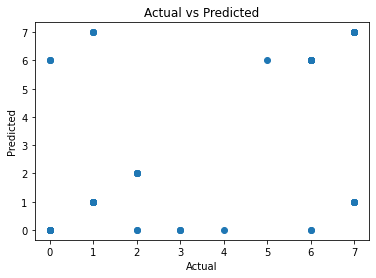

In [40]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [39]:
# 计算准确率Accuracy
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
# 计算精确率Precision
# 计算召回率Recall
# 计算F1-score
# 计算ROC曲线下的面积
# 计算混淆矩阵
train_accuracy,test_accuracy

(1.0, 0.828125)

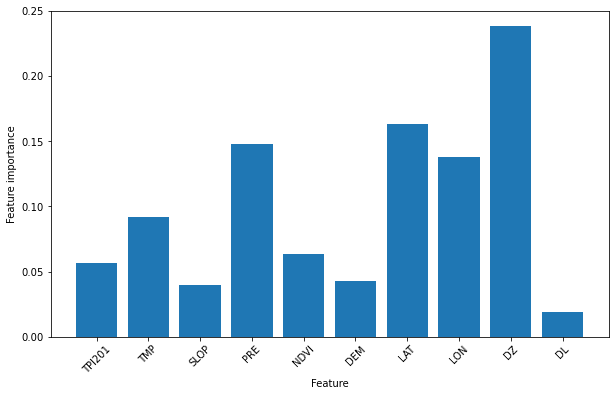

In [41]:
import matplotlib.pyplot as plt
importance = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
plt.bar(range(len(features)), importance, align='center')
plt.xticks(np.arange(len(features)), features, rotation = 45)
plt.ylabel("Feature importance")
plt.xlabel("Feature")
plt.show()

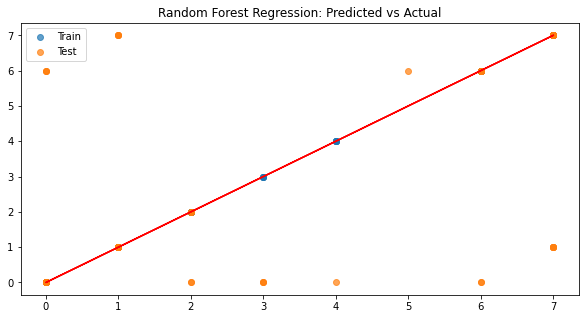

In [42]:
# 在训练集和测试集上的预测值

train_preds = rf.predict(X_train)

test_preds = rf.predict(X_test)



plt.figure(figsize=(10,5))



# 画出训练集的散点图

plt.scatter(y_train, train_preds, label='Train', alpha=.7)

# 画出测试集的散点图

plt.scatter(y_test, test_preds, label='Test', alpha=.7)

# 画出y=x线
plt.plot(y_test, y_test, color='red')



plt.legend()

plt.title('Random Forest Regression: Predicted vs Actual')

plt.show()